Import Libraries

Lasio for LAS file data import

In [1]:
import lasio

Numerical and Plot Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Use inline, notebook or widget accordingly
%matplotlib inline

plt.style.use("ggplot")

Read LAS file and create a Pandas dataframe

In [3]:
las = lasio.read("36_7-3.las")
df=las.df().reset_index()
print(df)

             DEPT  LITHOLOGY_GEOLINK    CALI      DRHO      NPHI      RHOB  \
0     2391.052246               13.0  7.5995  2.602001  0.163522  2.602001   
1     2391.204590               13.0  7.5995  2.614181  0.154614  2.614181   
2     2391.357178               13.0  7.5995  2.644800  0.146700  2.644800   
3     2391.509522               13.0  7.5995  2.622300  0.144200  2.622300   
4     2391.661865               13.0  7.5995  2.611018  0.143301  2.611018   
...           ...                ...     ...       ...       ...       ...   
3659  2948.683838                NaN  7.5995       NaN       NaN       NaN   
3660  2948.836426                NaN  7.5995       NaN       NaN       NaN   
3661  2948.988770                NaN  7.5995       NaN       NaN       NaN   
3662  2949.141113                NaN  7.5995       NaN       NaN       NaN   
3663  2949.293457                NaN  7.5995       NaN       NaN       NaN   

           PEF          GR        DTC    RDEP      RMED  
0    

Take some VSH core data points

In [4]:
DEPT_CORE =  np.array([2525, 2530, 2560, 2565, 2570.8, 2620])
VSH_CORE = np.array(([0.8, 0.8, 0.20, 0.05,0.85, 0.08]))


Look at the GR log values precisely at core depth points

In [5]:
GR_CORE = np.interp(DEPT_CORE, df["DEPT"], df["GR"])

Define a VSH function

In this example we are using Larionov for tertiary rocks

In [6]:
def vsh_larionov_tertiary(gr, gr_ma, gr_sh):
    return 0.083*((2**((gr - gr_ma)/(gr_sh-gr_ma)))-1)


Lets create a VSH curve with an initial aproximation of gr_ma and gr_sh

In [7]:
gr_ma = 0
gr_sh = 50
df["Vsh"] = vsh_larionov_tertiary(df["GR"], gr_ma, gr_sh)

Plot the results in a depth layout

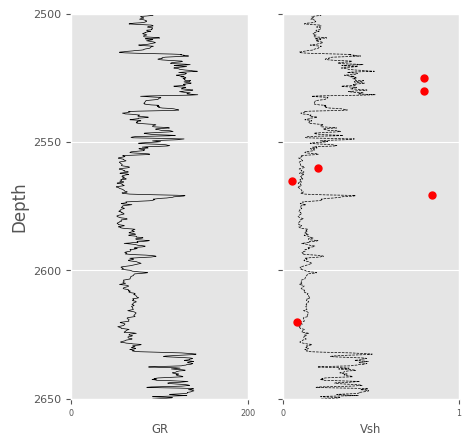

In [8]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(5,5))



ax[0].set_ylabel("Depth")
ax[0].set_ylim(2500, 2650)
ax[0].set_yticks(range(2500, 2650+1, 50), range(2500, 2650+1, 50), fontsize=8)
ax[0].invert_yaxis()

ax[0].set_xlabel("GR", fontsize="small")
ax[0].set_xlim(0,200)
ax[0].set_xticks([0, 200], [0, 200], fontsize="xx-small")

ax[0].plot(df["GR"],df["DEPT"], color="black", linewidth=0.5)

ax[1].set_xlabel("Vsh", fontsize="small")
ax[1].set_xlim(0, 1)
ax[1].set_xticks([0, 1], [0, 1], fontsize="xx-small")


ax[1].plot(df["Vsh"], df["DEPT"],"--", color="black", linewidth=0.5)
ax[1].plot(VSH_CORE, DEPT_CORE, "o", color="red", ms=5, label="Vsh core")

#ax[1].legend(bbox_to_anchor=(1.1, 0.5))
#ax[1].set_title("Before optimization")

fig.savefig("fig1.png", dpi=300)
plt.show()

Plot Vsh_core vs Gr scatter plot and the Vsh function

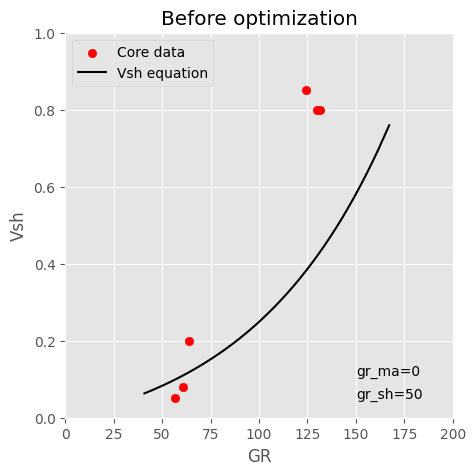

In [9]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(GR_CORE, VSH_CORE, color="red", label="Core data")
ax.plot(df["GR"].sort_values(), (vsh_larionov_tertiary(df["GR"].sort_values(), gr_ma, gr_sh)), color="black", label="Vsh equation")
ax.grid(True)
ax.legend(loc="upper left")
ax.set_title("Before optimization")

ax.set_xlabel("GR")
ax.set_ylabel("Vsh")

ax.set_xlim(0,200)
ax.set_ylim(0,1)

ax.annotate(f"gr_ma={round(gr_ma)}", (0.75, 0.11), xycoords="axes fraction")
ax.annotate(f"gr_sh={round(gr_sh)}", (0.75, 0.05), xycoords="axes fraction")


fig.savefig("fig2.png", dpi=300)
plt.show()

Now lets optimize the parameters

In [10]:
from scipy.optimize import curve_fit

We can give the initial gr_ma and gr_sh as starting point for the optimization

In [11]:
popt, pcov = curve_fit(vsh_larionov_tertiary, GR_CORE, VSH_CORE, p0 = (gr_ma, gr_sh))

We got the optimized gr_ma and gr_sh

In [12]:
gr_ma = popt[0]
gr_sh = popt[1]

print(gr_ma, gr_sh)

17.150272422248275 49.695839486147435


Now we can regenerate the Vsh curve with the new optimized parameters

In [13]:
df["Vsh"] = (vsh_larionov_tertiary(df["GR"], gr_ma, gr_sh))

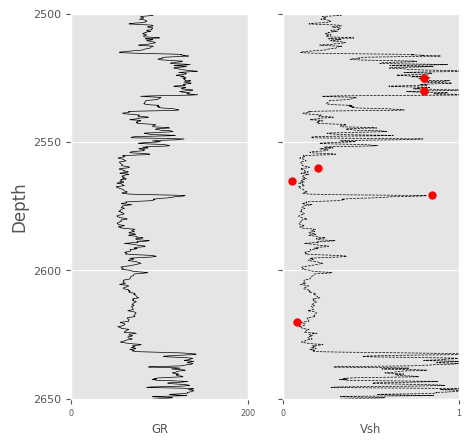

In [14]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(5,5))



ax[0].set_ylabel("Depth")
ax[0].set_ylim(2500, 2650)
ax[0].set_yticks(range(2500, 2650+1, 50), range(2500, 2650+1, 50), fontsize=8)
ax[0].invert_yaxis()

ax[0].set_xlabel("GR", fontsize="small")
ax[0].set_xlim(0,200)
ax[0].set_xticks([0, 200], [0, 200], fontsize="xx-small")

ax[0].plot(df["GR"],df["DEPT"], color="black", linewidth=0.5)

ax[1].set_xlabel("Vsh", fontsize="small")
ax[1].set_xlim(0, 1)
ax[1].set_xticks([0, 1], [0, 1], fontsize="xx-small")


ax[1].plot(df["Vsh"], df["DEPT"],"--", color="black", linewidth=0.5)
ax[1].plot(VSH_CORE, DEPT_CORE, "o", color="red", ms=5, label="Vsh core")

#ax[1].legend(bbox_to_anchor=(1.1, 0.5))
#ax[1].set_title("After optimization")


fig.savefig("fig3.png", dpi=300)
plt.show()

And plot the calibrated equation against the core data

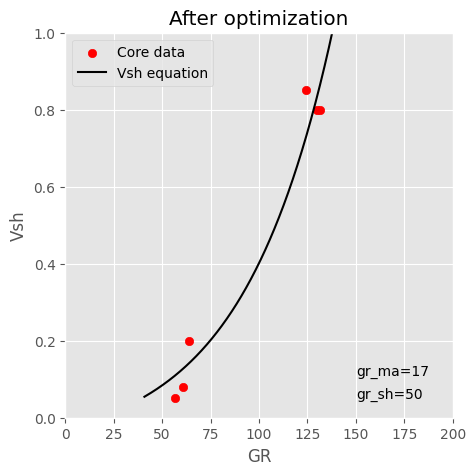

In [15]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(GR_CORE, VSH_CORE, label="Core data", color="red")
ax.plot(df["GR"].sort_values(), vsh_larionov_tertiary(df["GR"].sort_values(), gr_ma, gr_sh), label= "Vsh equation", color="black")
ax.grid(True)
ax.legend(loc="upper left")
ax.set_xlabel("GR")
ax.set_ylabel("Vsh")
ax.set_xlim(0,200)
ax.set_ylim(0,1)

ax.set_title("After optimization")

ax.annotate(f"gr_ma={round(gr_ma)}", (0.75, 0.11), xycoords="axes fraction")
ax.annotate(f"gr_sh={round(gr_sh)}", (0.75, 0.05), xycoords="axes fraction")


fig.savefig("fig4.png", dpi=300)
plt.show()